## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 5
---------------------------------------

GOALS:

1. Answer all the questions from the lecture.
2. Practice wrangling data
3. (challenge) do a mini data analysis of your own!

----------------------------------------------------------

This homework has **7 questions** from the lecture and **2 Problems**.

NOTE:
* Questions tend to be short answer or things were you change very minor parts of some given code.
* Problems tend to be more involved, like trying out our methods on a new column.
* Challenge problems are optional! They are intended to challenge you to reach beyond the basics of the class. I hope you will try the challenge problems!

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

### Load the raw data:

* Data from two hotels: one resort and one city hotel
* Observations: Each row represents a hotel booking
* Goal for original data collection: Development of prediction models to classify a hotel booking's likelihood to be canceled [Antonia et al., 2019](https://www.sciencedirect.com/science/article/pii/S2352340918315191#bib5)


[Data Information: Tidy Tuesday](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md)

In [2]:
file_location = 'https://joannabieri.com/introdatascience/data/hotels.csv'
DF_raw_hotels = pd.read_csv(file_location)

In [3]:
show(DF_raw_hotels)

Loading ITables v2.5.2 from the internet... (need help?)


**Q1** Can you figure out how you would focus on multiple columns? We have done this before so see if you can remember the command. It's okay if you need to copy and paste!

In [5]:
# Your code here
DF = pd.DataFrame({
    'hotel': ['Resort Hotel', 'City Hotel', 'Resort Hotel', 'City Hotel'],
    'lead_time': [342, 737, 7, 13]
})
DF[['hotel','lead_time']]

,hotel,lead_time
0,Resort Hotel,342
1,City Hotel,737
2,Resort Hotel,7
3,City Hotel,13


#### Sorting Example - Descending order

In [6]:
my_columns = ['hotel','lead_time']
DF_lead_time_sorted = DF_raw_hotels[my_columns].sort_values('lead_time', ascending=False)
show(DF_lead_time_sorted)

Loading ITables v2.5.2 from the internet... (need help?)


**Q2** Choose another set of variables (columns) that you can explore. Try sorting them ascending and descending.

In [11]:
# Your code here:
DF[['hotel','lead_time']].sort_values('lead_time')

,hotel,lead_time
2,Resort Hotel,7
3,City Hotel,13
0,Resort Hotel,342
1,City Hotel,737


**Q3** What would happen if you tried to sort categorical data? Try sorting by the column "arrival_date_month". Do you get an error? Does it sort it? If so how is it sorted?

In [13]:
# Your code here:
DF[['hotel','lead_time']].sort_values('lead_time')

,hotel,lead_time
2,Resort Hotel,7
3,City Hotel,13
0,Resort Hotel,342
1,City Hotel,737


### Boolean Mask Example - Subsellect Data

Here is an example of focusing only on 'Resort Hotel' data in the 'hotel' column

In [23]:
mask = DF_raw_hotels['hotel']== 'Resort Hotel'
show(DF_raw_hotels[mask])

Loading ITables v2.5.2 from the internet... (need help?)


**Problem 1** Can you create a data frame that:

1. Selects the columns "hotel", "year", and "month"
2. Sorts by year ascending.
3. Masks to only show the month of "August"

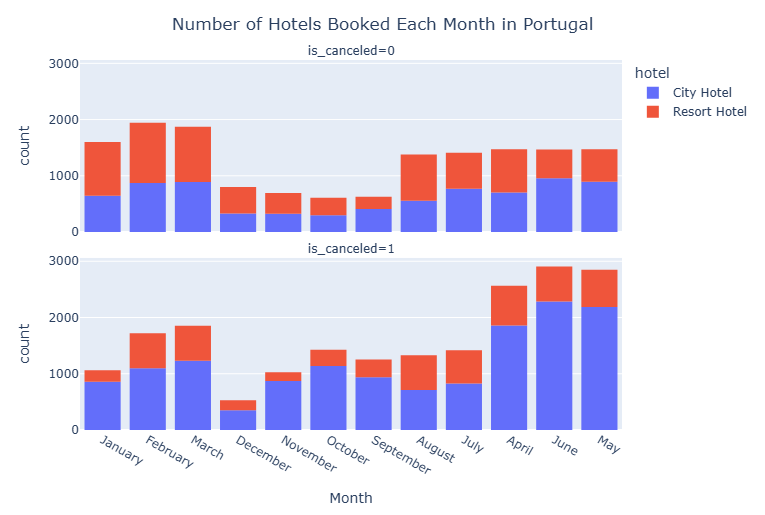

In [77]:
my_columns = ['hotel',
              'arrival_date_year',
              'is_canceled', 
              'arrival_date_month',
              'country']
sort_column = 'arrival_date_year'

fig.show()

#### Basic Operators

| Operator | Definition |
|----------|------------|
|<|less than|
|>|greater than|
|<=| less than or equal to|
|>=| greater than or equal to|
|==| exactly equal to|
|!=| not equal to|

#### Advanced Operators

| Operator | Definition |
|----------|------------|
| and | check if two things are both true|
| or | check if one of two things is true|
| in | checks if something is in another thing|
| ! | not checks if something is false|

**Q4** Try to say whether each cell will print true or false before running the code:

In [25]:
3<10

True

In [26]:
10<3

False

In [27]:
3<10 and 2<10

True

In [28]:
'cat' == 'cat'

True

In [29]:
'CAT'=='cat'

False

In [30]:
'CAT'!='cat'

True

In [31]:
2<=2

True

In [32]:
2<=2 or 2<1

True

In [33]:
my_numbers = [3,6,18,42]
42 in my_numbers

True

**Q5** Create 5 more logical operator tests and show the results.

In [35]:
# Your code here
5<3

False

In [40]:
# Your code here
Lebron = [23]
23 in Lebron

True

In [56]:
"Jordan" == "GOAT" #its Lebron

False

In [58]:
# Your code here
67==67

True

In [61]:
"GOAT" == "Me" #python hates me 

False

In [62]:
# Your code here
"Jordan" != "Lebron"

True

### Follow Along - Example Analysis

Now that we know some logical operators we can create fancier boolean masks and get more interesting subsets of our data. Here is a mini analysis of our data using what we know so far. See if you can figure out what each command is doing. 

**Q6** Add your comments explaining the code:


In [63]:
# Add your comments: 
DF_raw_hotels['country'].value_counts()

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
MRT        1
KIR        1
SDN        1
ATF        1
SLE        1
Name: count, Length: 177, dtype: int64

Wow there is a lot of data for PRT (Portugal)!

In [65]:
# Here I am defining the variables (columns) I care about the vairiables and how its sorted
my_country = 'PRT'
my_columns = ['hotel',
              'arrival_date_year',
              'is_canceled', 
              'arrival_date_month',
              'country']
sort_column = 'arrival_date_year'

# Add your comments: Looking at the code looks like its sorted by year 
DF_mini_analysis = DF_raw_hotels[my_columns].sort_values(sort_column).copy()
show(DF_mini_analysis)

Loading ITables v2.5.2 from the internet... (need help?)


In [67]:
# What does this first mask do?
# Your comments: mask is only showing data for Portugal
mask_country = DF_mini_analysis['country']==my_country
DF_mini_analysis_masked = DF_mini_analysis[mask_country]
show(DF_mini_analysis_masked)

Loading ITables v2.5.2 from the internet... (need help?)


In [69]:
# What does this second mask do?
# Your comments: Makes the arival year greater then 2015
mask_years = DF_mini_analysis_masked['arrival_date_year']>2015
DF_mini_analysis_masked = DF_mini_analysis_masked[mask_years] 
# Notice that I wrote over my data in the command above

show(DF_mini_analysis_masked)

Loading ITables v2.5.2 from the internet... (need help?)


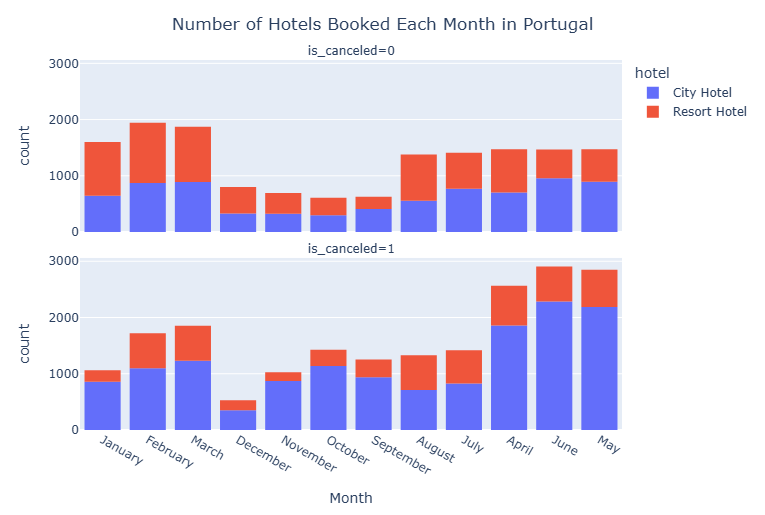

In [70]:
fig = px.histogram(DF_mini_analysis_masked,
                  x='arrival_date_month',
                  color='hotel',
                  facet_col='is_canceled',
                  facet_col_wrap=1)

fig.update_layout(title='Number of Hotels Booked Each Month in Portugal',
                  title_x=0.5,
                  xaxis_title="Month",
                  autosize=False,
                  width=800,
                  height=500)
fig.show()

**Q7** What exactly is this histogram showing and what is excluded based on the analysis we did above? Is there anything interesting about the graph? Any questions raised?

The graph shows Portugal hotel bookings by month, split into canceled vs not canceled. Cancellations peak in April–June, especially for City Hotels.

**Problem 2** Now it's your turn to do a mini analysis. Please do the following:

1. Choose a subset of columns that you are interested in and look just at those column.
2. Make at least one mask that will remove some of the data (eg. look only at one categorical value OR one or more numerical values.
3. Sort the data using one of the columns.
4. Make a histogram or bar graph of your final data set.
5. Describe in words what you see in your graph, or if there is anything interesting there.

In [76]:
# Your code here - you will probably need more than one cell

df_subset = DF[['hotel', 'arrival_date_year', 'is_canceled', 'country']]  

mask_city = df_subset['hotel'] == 'City Hotel'
df_city = df_subset[mask_city]

df_city_sorted = df_city.sort_values(by='arrival_date_year')

import plotly.express as px

fig = px.bar(
    df_city_sorted,
    x='arrival_date_year',
    color='is_canceled',
    barmode='group',
    title='City Hotel Bookings vs Cancellations by Year'
)
fig.show()

KeyError: "['arrival_date_year', 'is_canceled', 'country'] not in index"

# End Of Homework

### Everything below here is extra - just so you have a copy of the code I showed in lecture.

### Excluding variables - removing one column (Extra)

There are a few ways to get rid of columns. The first would be to write down ALL the columns and leave out one. Let's say we want to leave out information about the "agent" variable.

In [ ]:
# First get all of them
my_columns = list(DF_raw_hotels.keys())
# Then remove the one you don't want
my_columns.remove('agent')
# Then get the new data frame
DF_raw_hotels[my_columns]

### Fancy ways to get columns (Extra - ADVANCED)

There are fancy ways to get a list of columns that you might be interested in.

#### Starts with

You can use the command **startswith()** to check if a variable starts with a word or part of a word. Here is code to get only columns that start with the word "arrival":

In [ ]:
# Get the list of all the columns
columns_list = list(DF_raw_hotels.keys())
# Get true false values using the startswith() comand
column_mask = [column.startswith('arrival') for column in columns_list]
# Mask the column names to get just the ones you want and make a list
my_columns = list(DF_raw_hotels.keys()[column_mask])
print(my_columns)

#### Ends with

You can use the command **endswith()** to check if a variable ends with a word or part of a word. Here is code to get only columns that end with the word "type":

In [ ]:
# Get the list of all the columns
columns_list = list(DF_raw_hotels.keys())
# Get true false values using the startswith() comand
column_mask = [column.endswith('type') for column in columns_list]
# Mask the column names to get just the ones you want and make a list
my_columns = list(DF_raw_hotels.keys()[column_mask])
print(my_columns)

#### IN

You can use the Python check  **is in** to check if a variable contains a word or part of a word. Here is code to get only columns that contain the word "date":

In [ ]:
# Get the list of all the columns
columns_list = list(DF_raw_hotels.keys())
# Get true false values using the startswith() comand
column_mask = ["date" in column for column in columns_list]
# Mask the column names to get just the ones you want and make a list
my_columns = list(DF_raw_hotels.keys()[column_mask])
print(my_columns)